# API Practice

In [2]:
import requests
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

### NASA Exoplanet API
This API returns a csv, which can be directly read into pandas.

In [74]:
url = 'https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?' + \
      'table=exoplanets&select=pl_hostname,pl_name,pl_discmethod,pl_pnum,pl_radj,' + \
      'pl_dens,pl_locale,pl_telescope,pl_orbper&order=dec'


In [75]:
df = pd.read_csv(url)

In [76]:
df.head()

,pl_hostname,pl_name,pl_discmethod,pl_pnum,pl_radj,pl_dens,pl_locale,pl_telescope,pl_orbper
0,HD 142022 A,HD 142022 A b,Radial Velocity,1,NaN,NaN,Ground,1.2 m Leonhard Euler Telescope,1928.0000
1,HD 39091,pi Men c,Transit,2,0.182,2.97,Space,0.1 m TESS Telescope,6.2679
2,HD 39091,HD 39091 b,Radial Velocity,2,NaN,NaN,Ground,3.9 m Anglo-Australian Telescope,2093.0700
3,HD 137388,HD 137388 b,Radial Velocity,1,NaN,NaN,Ground,3.6 m ESO Telescope,330.0000
4,GJ 3021,GJ 3021 b,Radial Velocity,1,NaN,NaN,Ground,1.2 m Leonhard Euler Telescope,133.7100


In [77]:
df.pl_telescope.nunique()

68

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 9 columns):
pl_hostname      3933 non-null object
pl_name          3933 non-null object
pl_discmethod    3933 non-null object
pl_pnum          3933 non-null int64
pl_radj          3073 non-null float64
pl_dens          426 non-null float64
pl_locale        3933 non-null object
pl_telescope     3933 non-null object
pl_orbper        3829 non-null float64
dtypes: float64(3), int64(1), object(5)
memory usage: 276.6+ KB


In [79]:
df.pl_discmethod.unique()

array(['Radial Velocity', 'Transit', 'Imaging', 'Astrometry',
       'Eclipse Timing Variations', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations', 'Transit Timing Variations',
       'Orbital Brightness Modulation'], dtype=object)

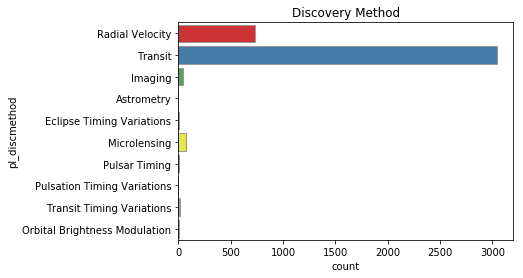

In [80]:
sns.countplot(y='pl_discmethod', 
              palette="Set1", 
              edgecolor=".6",
              data=df)
plt.title('Discovery Method')
plt.show()

In [81]:
teles = df.groupby('pl_telescope').count()['pl_hostname'].sort_values(ascending=False)
teles[0:20]

pl_telescope
0.95 m Kepler Telescope                2702
Canon 200mm f/1.8L                      200
3.6 m ESO Telescope                     171
10 m Keck I Telescope                   162
Multiple Telescopes                     135
0.18 m Takahashi Epsilon Astrograph      54
1.3 m Warsaw University Telescope        50
1.93 m Telescope                         45
1.2 m Leonhard Euler Telescope           44
3.9 m Anglo-Australian Telescope         35
0.27 m CoRoT Telescope                   31
3.0 m C. Donald Shane Telescope          26
9.2 m Hobby-Eberly Telescope             25
1.88 m Telescope                         23
1.8 m MOA Telescope                      23
3.58 m Telescopio Nazionale Galileo      17
Mamiya 645 80mm f/1.9                    17
1.8 m Telescope                          16
6.5 m Magellan II Clay Telescope         11
10 m Keck II Telescope                    9
Name: pl_hostname, dtype: int64

In [82]:
teles.index[0]

'0.95 m Kepler Telescope'

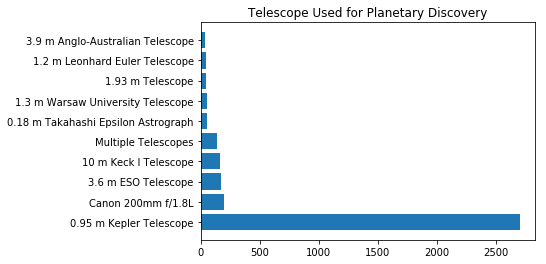

In [83]:
plt.title('Telescope Used for Planetary Discovery')
plt.barh(y=teles.index[0:10], width=teles[0:10])
plt.show()

In [84]:
df['pl_pnum'].unique()

array([1, 2, 3, 6, 5, 4, 7, 8])

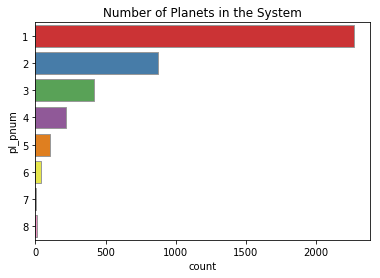

In [85]:
sns.countplot(y='pl_pnum', 
              palette="Set1", 
              edgecolor=".6",
              data=df)
plt.title('Number of Planets in the System')
plt.show()

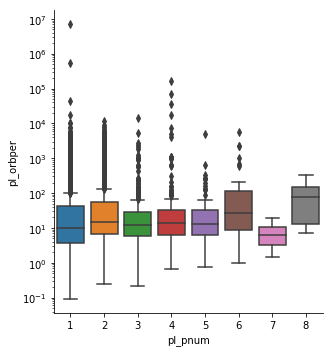

In [96]:
# Exclude a few outliers

g = sns.catplot(x='pl_pnum', y='pl_orbper', kind='box', data=df)
g.fig.get_axes()[0].set_yscale('log')
plt.show()

## Possible Analyses:
1) Could look at predicting which type of instrument discovered each planet.  
2) Look at predicting orbital period based on parameters